In [ ]:
# Underftting = the network hasn't yet learned the parameters useful for prediction on trainnig data

# Overfitting = the network is optimized on the training data and is failing to generalize on new data
# 1) Noisy data -> invalid inputs, mislabeled targets
# 2) Ambiguous features -> input feature space is overlapping for classes where there is no objective boundary
# 3) Rare features -> 1 in a 100 or 1000

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(60000, 28, 28)

In [6]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
train_images.shape

(60000, 784)

In [7]:
len(train_images)

60000

In [15]:
# All white channels -> noise
# All black channels -> all zeros

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random(size = (len(train_images), 784))], axis = 1
)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros(shape = (len(train_images), 784))], axis = 1
)

In [16]:
print(train_images_with_noise_channels.shape)

(60000, 1568)


In [17]:
print(train_images_with_zeros_channels.shape)

(60000, 1568)


In [18]:
784+784

1568

In [24]:
def get_model():
  model = keras.Sequential( [
      layers.Dense(512, activation = "relu"),
      layers.Dense(10, activation = "softmax")
  ])

  model.compile(
      optimizer = "rmsprop",
      loss = "sparse_categorical_crossentropy",
      metrics = ["accuracy"]
  )

  return model

In [25]:
train_labels.shape

(60000,)

In [26]:
model = get_model()
history_noise = model.fit(train_images_with_noise_channels,
                          train_labels,
                          epochs = 10,
                          batch_size = 128,
                          validation_split = 0.2
                          )

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6932 - loss: 1.0466 - val_accuracy: 0.8571 - val_loss: 0.4655
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9135 - loss: 0.2790 - val_accuracy: 0.9423 - val_loss: 0.1962
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9475 - loss: 0.1739 - val_accuracy: 0.9528 - val_loss: 0.1626
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9609 - loss: 0.1246 - val_accuracy: 0.9628 - val_loss: 0.1259
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9725 - loss: 0.0871 - val_accuracy: 0.9629 - val_loss: 0.1252
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9780 - loss: 0.0650 - val_accuracy: 0.9638 - val_loss: 0.1252
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9847 - loss: 0.0480 - val_accuracy: 0.9369 - val_loss: 0.2258
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9884 - loss: 0.0357 - val_accuracy: 0.

In [28]:
model = get_model()

history_zeros = model.fit(train_images_with_zeros_channels,
                          train_labels,
                          epochs = 10,
                          batch_size = 128,
                          validation_split = 0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8550 - loss: 0.4905 - val_accuracy: 0.9573 - val_loss: 0.1534
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9585 - loss: 0.1396 - val_accuracy: 0.9655 - val_loss: 0.1160
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9756 - loss: 0.0854 - val_accuracy: 0.9703 - val_loss: 0.0952
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9821 - loss: 0.0619 - val_accuracy: 0.9755 - val_loss: 0.0844
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0438 - val_accuracy: 0.9770 - val_loss: 0.0768
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9910 - loss: 0.0319 - val_accuracy: 0.9766 - val_loss: 0.0850
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9918 - loss: 0.0275 - val_accuracy: 0.9759 - val_loss: 0.0842
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9953 - loss: 0.0187 - val_accuracy: 0.

In [30]:
history_dict = history_noise.history
history_dict.items()

dict_items([('accuracy', [0.8093958497047424, 0.9207291603088379, 0.9490208625793457, 0.9629166722297668, 0.9725000262260437, 0.9790624976158142, 0.9846041798591614, 0.9884166717529297, 0.9920416474342346, 0.9938541650772095]), ('loss', [0.6195041537284851, 0.25705403089523315, 0.1674634963274002, 0.11974309384822845, 0.08824344724416733, 0.06413378566503525, 0.047775208950042725, 0.03473431617021561, 0.025713156908750534, 0.018743714317679405]), ('val_accuracy', [0.8570833206176758, 0.9422500133514404, 0.952833354473114, 0.9628333449363708, 0.9629166722297668, 0.9638333320617676, 0.9369166493415833, 0.9660000205039978, 0.9554166793823242, 0.9715833067893982]), ('val_loss', [0.46552515029907227, 0.1962277591228485, 0.162618026137352, 0.12591250240802765, 0.1252339631319046, 0.12516964972019196, 0.22581098973751068, 0.12017296999692917, 0.16928507387638092, 0.12279057502746582])])

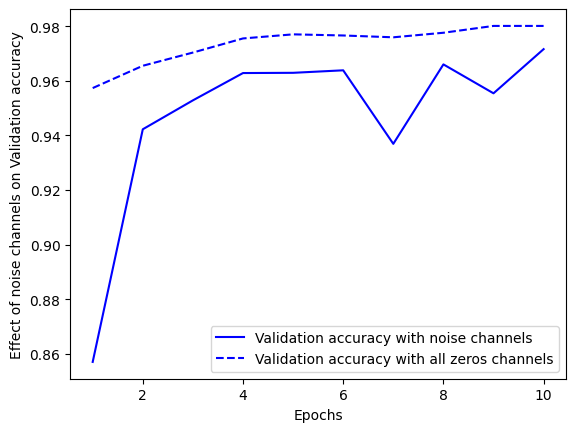

In [33]:
all_noise_val_acc = history_noise.history["val_accuracy"]
all_zeros_val_acc = history_zeros.history["val_accuracy"]
epochs = range(1, 11)

plt.plot(epochs, all_noise_val_acc, "b-", label = "Validation accuracy with noise channels")
plt.plot(epochs, all_zeros_val_acc, "b--", label = "Validation accuracy with all zeros channels")
plt.xlabel("Epochs")
plt.ylabel("Effect of noise channels on Validation accuracy")
plt.legend()
plt.show()

In [34]:
# it is clear that adding noise reducs the validation accuracy by 1% point
# noisy channels lead to overfitting
# therefore, it's necessary to do usefuleness score for each feature to find the mutual information between the feature and the labels